In [ ]:
! pip install --quiet llama-index llama-index-llms-openai openai chromadb

In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
dir_path = '/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/LLamaIndex_Langchain/simpleApplication/data'

# Basics

[Basic Storing](https://docs.llamaindex.ai/en/stable/getting_started/starter_example.html)


In [ ]:
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex

In [ ]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

By default, the data you just loaded is stored in memory as a series of vector embeddings. You can save time (and requests to OpenAI) by saving the embeddings to disk. That can be done with this line:

```
index.storage_context.persist()
```

In [ ]:
from llama_index.core import StorageContext, load_index_from_storage

In [ ]:
PERSIST_DIR = 'storage'

if not os.path.exists(PERSIST_DIR):
  # load the document and create the index
  documents = SimpleDirectoryReader(dir_path).load_data()

  index = VectorStoreIndex.from_documents(documents, show_progress=True)

  # Store the embedding for later use
  index.storage_context.persist(persist_dir=PERSIST_DIR)

else:
  # load the existing index
  storage_context = StorageContext.from_defaults(persist_dir=PERSIST_DIR)
  index = load_index_from_storage(storage_context=storage_context)

In [ ]:
query_engine = index.as_query_engine()

In [ ]:
response = query_engine.query('What is yolo world')

from llama_index.core.response.pprint_utils import pprint_response

pprint_response(response=response, show_source=True)

Final Response: YOLO-World is an innovative approach that enhances
YOLO with open-vocabulary detection capabilities through vision-
language modeling and pre-training on large-scale datasets. It
introduces a new Re-parameterizable Vision-Language Path Aggregation
Network (RepVL-PAN) and region-text contrastive loss to facilitate the
interaction between visual and linguistic information. YOLO-World
excels in detecting a wide range of objects in a zero-shot manner with
high efficiency, achieving notable performance on various tasks like
object detection and open-vocabulary instance segmentation.
______________________________________________________________________
Source Node 1/2
Node ID: 66c33bd3-9efd-4931-a65b-bf0c013ccd46
Similarity: 0.8204909778092427
Text: Abstract  The You Only Look Once (YOLO) series of detectors have
established themselves as efficient and practical tools. However,
their reliance on predefined and trained object categories limits
their applicability in open scen

In [ ]:
response = query_engine.query('who are the non independed board of director')

from llama_index.core.response.pprint_utils import pprint_response

pprint_response(response=response, show_source=True)

Final Response: The non-independent board of directors are GELAN-C and
GELAN-E.
______________________________________________________________________
Source Node 1/2
Node ID: febf57cd-a0cd-470c-88cc-60a7d905b2a0
Similarity: 0.6410295732483425
Text: 5.4.2 Programmable Gradient Information In terms of PGI, we
performed ablation studies on auxiliary reversible branch and multi-
level auxiliary information on the backbone and neck, respectively. We
designed auxiliary reversible branch ICN to use DHLC [34] linkage to
obtain multi-level reversible information. As for multi-level aux-
iliary infor...
______________________________________________________________________
Source Node 2/2
Node ID: d06f9887-3318-4326-92dc-4c82d407555c
Similarity: 0.6395459121170832
Text: Figure 3. PGI and related network architectures and methods. (a)
Path Aggregation Network (PAN)) [37], (b) Reversible Columns (RevCol)
[3], (c) conventional deep supervision, and (d) our proposed
Programmable Gradient Informatio

# Using Vector Stores

[Storing](https://docs.llamaindex.ai/en/stable/understanding/storing/storing.html)


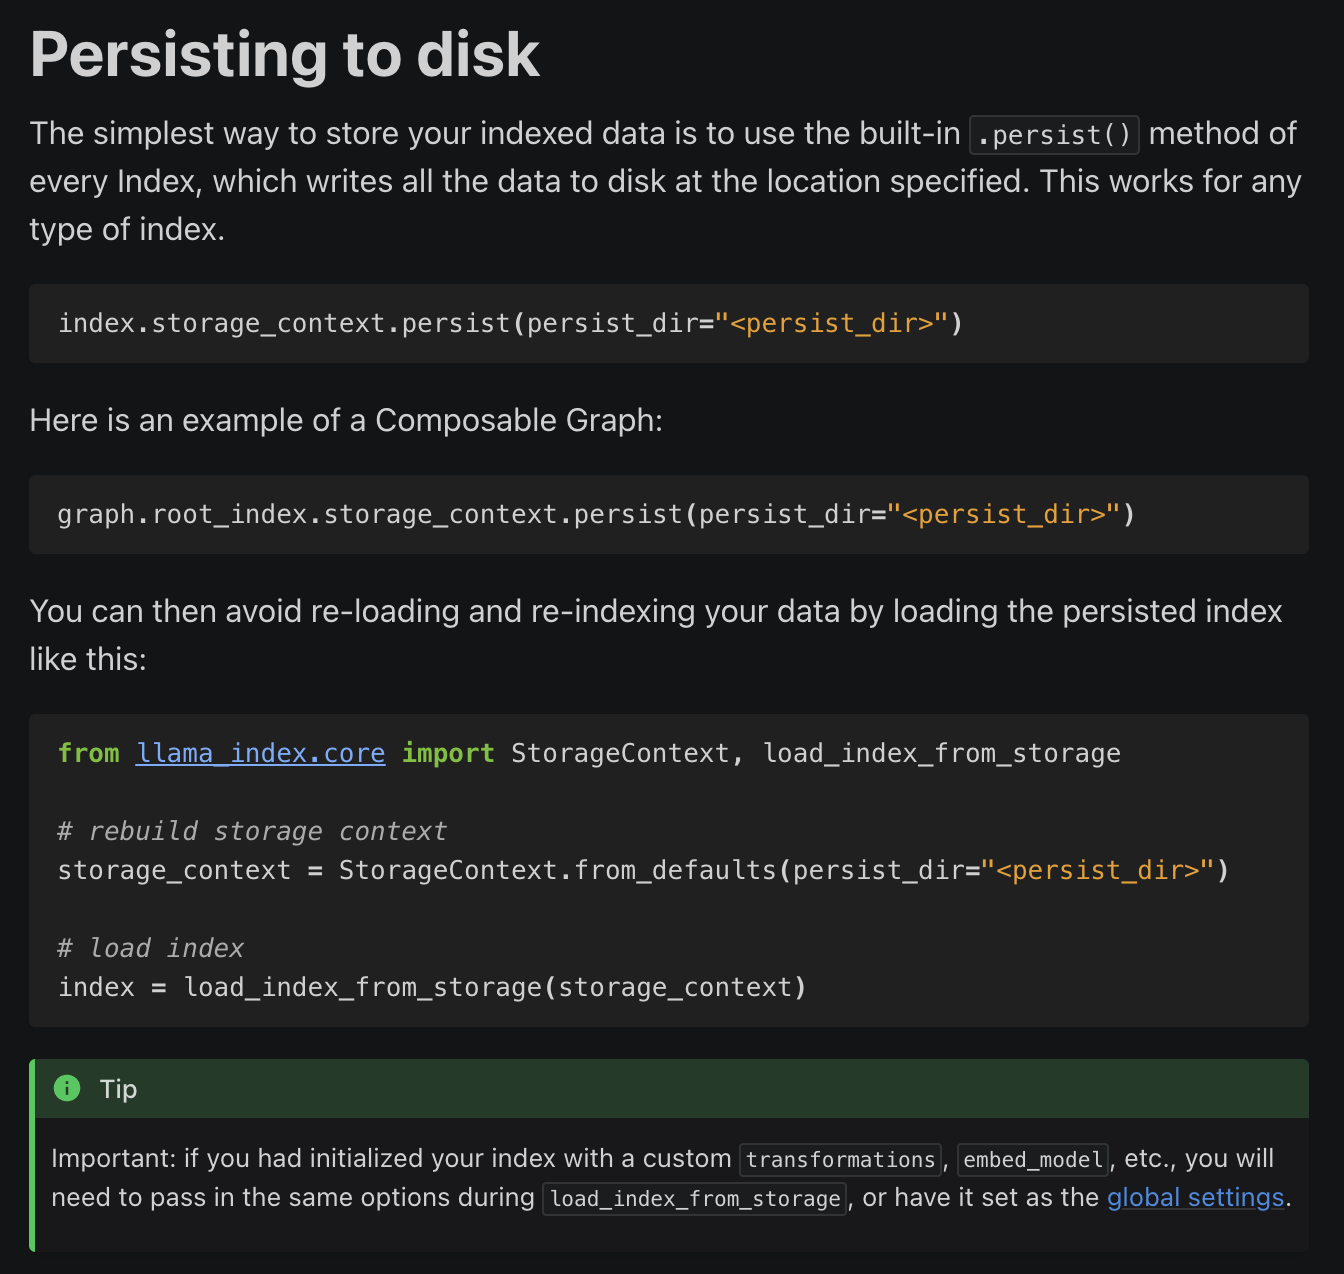

In [ ]:
import chromadb
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext

In [ ]:
# load some documents
documents = SimpleDirectoryReader(dir_path).load_data()

In [ ]:
_path = "new_chroma_db"

# Store Index
if not os.path.exists(_path):
  # Initialize client, setting path to save data
  db = chromadb.PersistentClient(path = _path)

  # create collection
  chroma_collection = db.get_or_create_collection("Tutorial_basics")

  # Assign chroma as the vector_store to the context
  vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
  storage_context = StorageContext.from_defaults(vector_store=vector_store)

  # Create index
  index = VectorStoreIndex.from_documents(
      documents=documents,
      storage_context=storage_context,
      show_progress=True
  )

else:
  # Load db
  # Initialize Client
  db = chromadb.PersistentClient(path = _path)

  # get collection
  chroma_collection = db.get_or_create_collection("Tutorial_basics")

  # Assign chroma as the vector_store to the context
  vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
  storage_context = StorageContext.from_defaults(vector_store=vector_store)

  # Load your index from stored vectors
  index = VectorStoreIndex.from_vector_store(
      vector_store=vector_store,
      storage_context=storage_context,
  )

Parsing nodes:   0%|          | 0/43 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/66 [00:00<?, ?it/s]

In [ ]:
# create a query engine
query_engine = index.as_query_engine(show_source = True)

response = query_engine.query("Explain Yolo World")

pprint_response(response=response,
                show_source=True
                )

Final Response: Yolo World is an innovative approach that enhances the
YOLO series of detectors by incorporating open-vocabulary detection
capabilities through vision-language modeling and pre-training on
large-scale datasets. It introduces a new Re-parameterizable Vision-
Language Path Aggregation Network (RepVL-PAN) and region-text
contrastive loss to enable the interaction between visual and
linguistic information. Yolo World excels in detecting a wide range of
objects in a zero-shot manner with high efficiency, achieving notable
performance on challenging datasets like LVIS. Additionally, it has
been continuously improved with updates such as high-resolution
support, enhanced accuracy, and faster speed, making it a state-of-
the-art method for object detection and open-vocabulary instance
segmentation.
______________________________________________________________________
Source Node 1/2
Node ID: 41d49431-a60f-4fc3-a90f-feca17ab9183
Similarity: 0.7061687900029666
Text: Abstract  Th

# Vector Stores

[Vector Stores](https://docs.llamaindex.ai/en/stable/module_guides/storing/vector_stores.html)


[Using a Vector Store as an Index](https://docs.llamaindex.ai/en/stable/community/integrations/vector_stores.html)

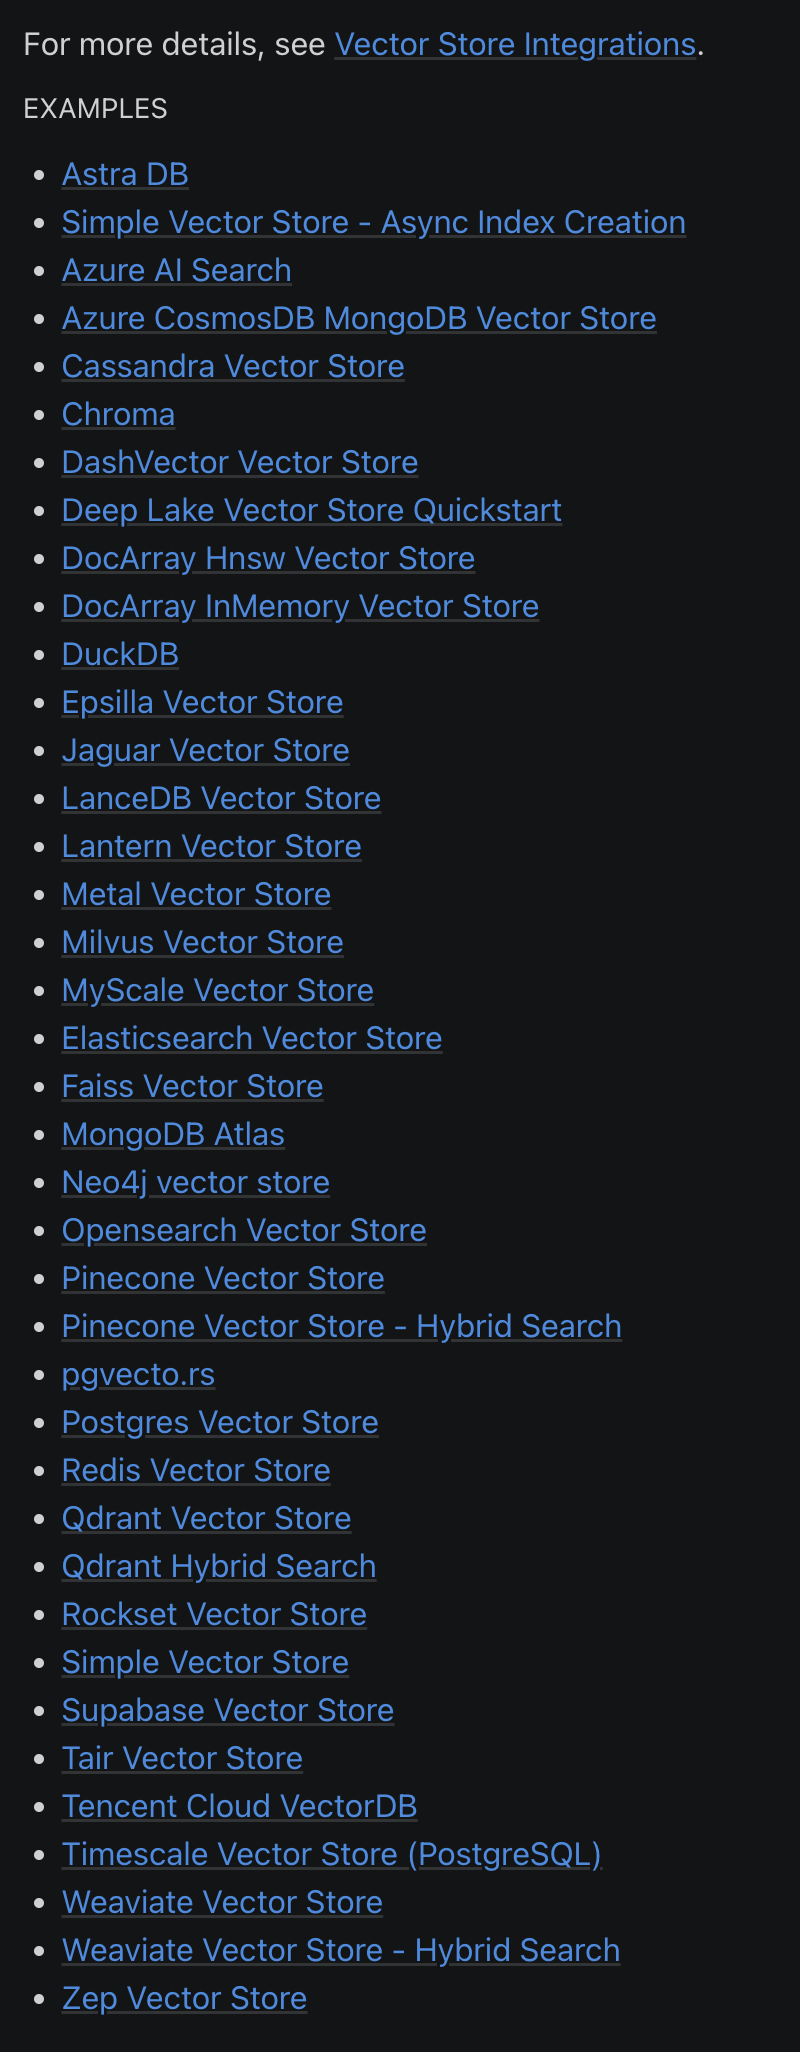